In [1]:
from src.constants import *
import matplotlib.pyplot as plt
import tensorflow as tf

2025-05-12 00:51:35 | INFO | Loading settings from the ZenML secret store.
2025-05-12 00:51:36 | WARNING | Failed to load settings from the ZenML secret store. Defaulting to loading the settings from the '.env' file.


In [2]:
print(PROJECT_BASE_DIR)

C:\Users\souss\Desktop\DE\xaipneumonia


In [3]:
print(CONFIG_FILE_PATH)

C:\Users\souss\Desktop\DE\xaipneumonia\config\config.yaml


In [4]:
from src.utils.configuration import ConfigurationManager

In [5]:
config = ConfigurationManager()
data_config = config.get_data_ingestion_config()
print(data_config)

{'data_ingestion': {'data_source': 'data/chestxray', 'cache_dir': 'data/hf_cache', 'batch_size': 8, 'image_size': [240, 240]}}
2025-05-12 00:51:58 | INFO | yaml file: C:\Users\souss\Desktop\DE\xaipneumonia\config\config.yaml loaded successfully
2025-05-12 00:51:58 | INFO | created directory at: data/hf_cache
DataIngestionConfig(data_source=WindowsPath('C:/Users/souss/Desktop/DE/xaipneumonia/data/chestxray'), cache_dir=WindowsPath('C:/Users/souss/Desktop/DE/xaipneumonia/data/hf_cache'), batch_size=8, image_size=BoxList([240, 240]))


In [6]:
from datasets import load_dataset

TensorFlow version 2.19.0 available.


In [7]:
print(type(data_config.data_source), type(data_config.cache_dir))

<class 'pathlib.WindowsPath'> <class 'pathlib.WindowsPath'>


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    PROJECT_BASE_DIR/data_config.data_source/"val",
    labels="inferred",
    label_mode="int",
    image_size=(1080, 1080),
    batch_size=data_config.batch_size,
    shuffle=True
)

print(type(val_ds))


Found 16 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [9]:
val_ds.class_names

['NORMAL', 'PNEUMONIA']

(1080, 1080, 3)


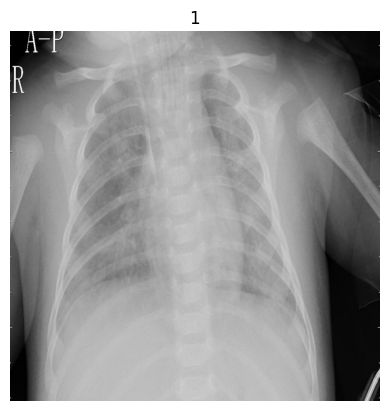

In [10]:
for s in val_ds.take(1):
    print(s[0][0].shape)
    plt.imshow(s[0][0].numpy().astype("uint8"))
    plt.title(s[1][0].numpy())
    plt.axis('off')
    plt.show()

In [11]:
from pipelines.data_pipeline import data_pipeline
from steps.ingest_data import ingestion

In [13]:
data_pipeline(data_config)


Initiating a new run for the pipeline: data_pipeline.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Step ingestion has started.
[ingestion] 2025-05-12 01:00:25 | INFO | Loading datasets from directories...
[ingestion] Found 5216 files belonging to 2 classes.
[ingestion] Found 16 files belonging to 2 classes.
[ingestion] Found 624 files belonging to 2 classes.
[ingestion] 2025-05-12 01:00:27 | SUCCESS | Datasets loaded and optimized successfully.
Step ingestion has finished in 41.545s.
Pipeline run has finished in 43.138s.


PipelineRunResponse(body=PipelineRunResponseBody(created=datetime.datetime(2025, 5, 12, 0, 0, 24, 239279), updated=datetime.datetime(2025, 5, 12, 0, 1, 7, 257595), user=UserResponse(body=UserResponseBody(created=datetime.datetime(2025, 5, 11, 22, 3, 17, 711919), updated=datetime.datetime(2025, 5, 11, 22, 4, 44, 756005), active=True, activation_token=None, full_name='SOUSSOU Koffi Désiré', email_opted_in=False, is_service_account=False, is_admin=True, default_project_id=None), metadata=None, resources=None, id=UUID('6782a33d-f31f-4b80-bfcd-61392d6a29e3'), permission_denied=False, name='default'), status=<ExecutionStatus.COMPLETED: 'completed'>, stack=StackResponse(body=StackResponseBody(created=datetime.datetime(2025, 5, 11, 22, 3, 17, 359034), updated=datetime.datetime(2025, 5, 11, 22, 3, 17, 359034), user=None), metadata=None, resources=None, id=UUID('0d238f1e-599c-4090-9c8b-3984e7b24c51'), permission_denied=False, name='default'), pipeline=PipelineResponse(body=PipelineResponseBody(c